In [120]:
import numpy as np
import pandas as pd
import csv
import os, sys
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter


In [148]:
benchmark_dir = "./benchmark"
csv_dir = "./results"
nproc_list = [1, 2, 4, 8, 16, 32, 64, 128]
trial_num = 10
map_list = [
            # '64room_005.csv',
            # '64room_005x2.csv',
            '64room_005x4.csv',
            # 'Boston_0_1024.csv',
            # 'Boston_0_2048.csv',
            'Boston_0_4096.csv',
            # 'Boston_0_512.csv',
            # 'Paris_1_1024.csv',
            # 'Paris_1_2048.csv',
            # 'Paris_1_256.csv',
            'Paris_1_4096.csv',
            # 'Paris_1_512.csv',
            # 'maze1024-1-9.csv',
            # 'maze1024-32-9.csv',
            # 'maze1024-4-6.csv',
            # 'maze1024-8-4.csv',
            'maze2048-1-9.csv',
            'maze2048-4-6.csv',
            # 'maze512-1-9.csv',
            # 'maze512-32-9.csv',
            # 'maze512-4-6.csv',
            # 'maze512-8-4.csv',
            # 'orz900d.csv',
            # 'orz900dx2.csv',
            # 'orz900dx4.csv',
            # 'random1024-40-5.csv',
            'random2048-40-5.csv',
            # 'random512-40-5.csv'
            ]
# map_list = sorted(list(os.listdir(csv_dir)))
# map_list


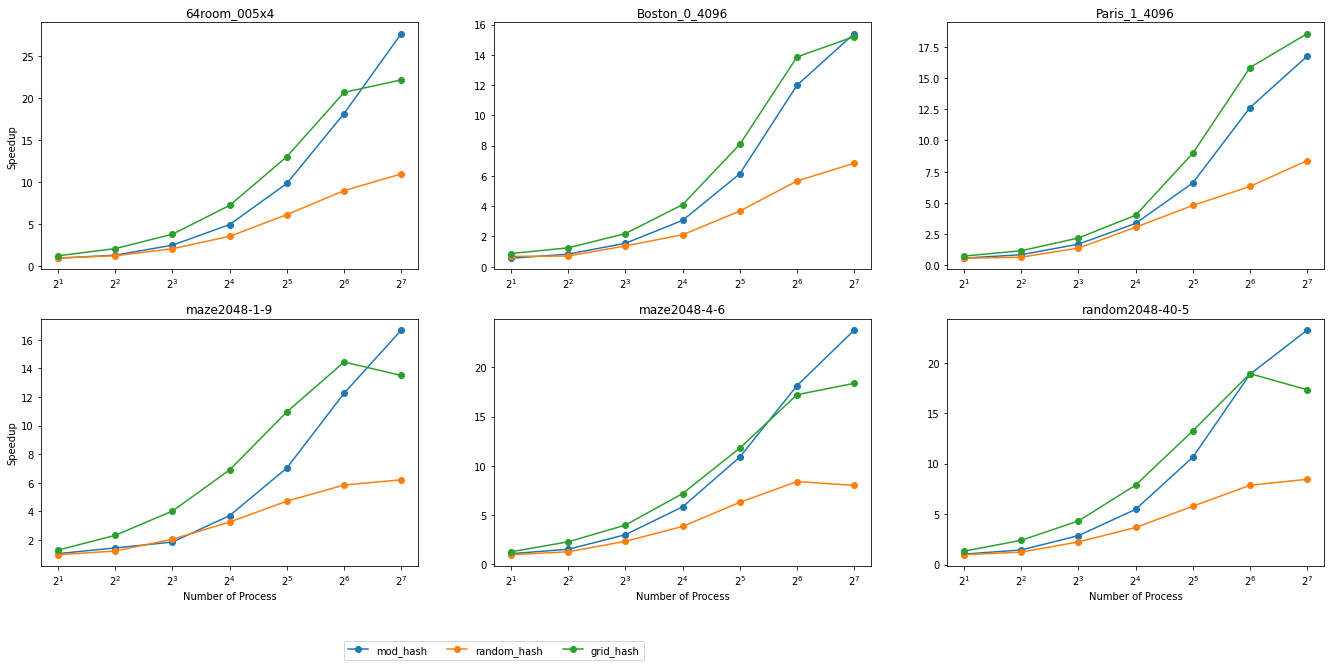

In [164]:
# main plot, speedup, on six enlarge 4 maps, compare 3 different hash
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(23,10))
axes = axes.flatten()
for ax in axes.flatten():
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))


plt.setp(axes[3], xlabel="Number of Process")
plt.setp(axes[4], xlabel="Number of Process")
plt.setp(axes[5], xlabel="Number of Process")
plt.setp(axes[0], ylabel="Speedup")
plt.setp(axes[3], ylabel="Speedup")

for hash in ['mod_hash', 'random_hash', 'grid_hash']:
    for mid, map in enumerate(map_list):
        axes[mid].set_xscale('log', base=2)
        axes[mid].set_title(map[:-4])
        
        csv_map_path = os.path.join(csv_dir, hash, map)
        df = pd.read_csv(csv_map_path)
        df['speedup'] = None
        df_base = df[df['#node received']==0]
        df = df[df['#node received'] > 0]
        for idx, row in df.iterrows():
            instance = row['instance name']
            trial_idx = row['trial index']
            base_row = df_base[(df_base['instance name']==instance) & (df_base['trial index']==trial_idx)].iloc[0]
            df.at[idx, 'speedup'] = base_row['runtime'] / row['runtime']
        df['speedup'] = df['speedup'].astype(float)
        group_dict = {'speedup':['mean']}
        gdf = df.groupby(['instance name', 'nproc'], as_index=False).agg(group_dict)
        axes[mid].plot(gdf['nproc'], gdf['speedup']['mean'], 'o-', label=hash, )
    

axes[4].legend(loc='lower center', ncol = 3, bbox_to_anchor=(-0.0, -0.4))
fig.savefig(f"./figures/speedup.png", bbox_inches='tight', dpi=600)




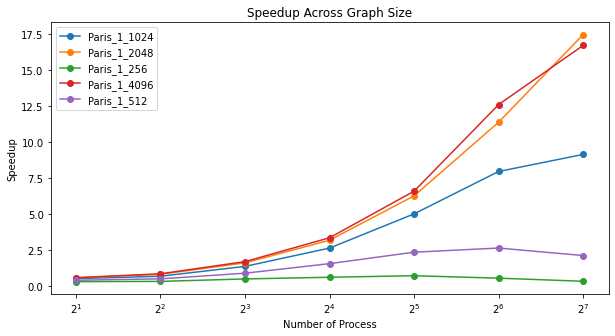

In [166]:
# speedup vs. graph size
map_list = sorted([
            'Paris_1_1024.csv',
            'Paris_1_2048.csv',
            'Paris_1_256.csv',
            'Paris_1_4096.csv',
            'Paris_1_512.csv',
            ])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.set_xscale('log', base=2)
ax.set_title("Speedup Across Graph Size")
plt.setp(ax, xlabel="Number of Process")
plt.setp(ax, ylabel="Speedup")

for mid, map in enumerate(map_list):
    csv_map_path = os.path.join(csv_dir, "mod_hash", map)
    df = pd.read_csv(csv_map_path)
    df['speedup'] = None
    df_base = df[df['#node received']==0]
    df = df[df['#node received'] > 0]
    for idx, row in df.iterrows():
        instance = row['instance name']
        trial_idx = row['trial index']
        base_row = df_base[(df_base['instance name']==instance) & (df_base['trial index']==trial_idx)].iloc[0]
        df.at[idx, 'speedup'] = base_row['runtime'] / row['runtime']
    df['speedup'] = df['speedup'].astype(float)
    group_dict = {'speedup':['mean']}
    gdf = df.groupby(['instance name', 'nproc'], as_index=False).agg(group_dict)
    ax.plot(gdf['nproc'], gdf['speedup']['mean'], 'o-', label=map[:-4], )

# ax.legend(loc='lower center', ncol = 3, bbox_to_anchor=(0.2, -0.4))
ax.legend()
fig.savefig(f"./figures/mapsize.png", bbox_inches='tight', dpi=600)




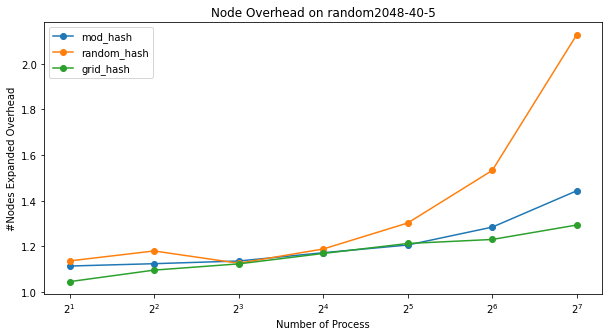

In [167]:
map = "random2048-40-5.csv"
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.set_xscale('log', base=2)
ax.set_title(f"Node Overhead on {map[:-4]}")
plt.setp(ax, xlabel="Number of Process")
plt.setp(ax, ylabel="#Nodes Expanded Overhead")
for hash in ['mod_hash', 'random_hash', 'grid_hash']:
    csv_map_path = os.path.join(csv_dir, hash, map)
    df = pd.read_csv(csv_map_path)
    df['work overhead'] = None
    df_base = df[df['#node received']==0]
    df = df[df['#node received'] > 0]
    for idx, row in df.iterrows():
        instance = row['instance name']
        trial_idx = row['trial index']
        base_row = df_base[(df_base['instance name']==instance) & (df_base['trial index']==trial_idx)].iloc[0]
        df.at[idx, 'work overhead'] = row['#node expanded'] / base_row['#node expanded']
    df['work overhead'] = df['work overhead'].astype(float)
    group_dict = {'work overhead':['mean']}
    gdf = df.groupby(['instance name', 'nproc'], as_index=False).agg(group_dict)
    ax.plot(gdf['nproc'], gdf['work overhead']['mean'], 'o-', label=hash )

ax.legend()
fig.savefig(f"./figures/node.png", bbox_inches='tight', dpi=600)


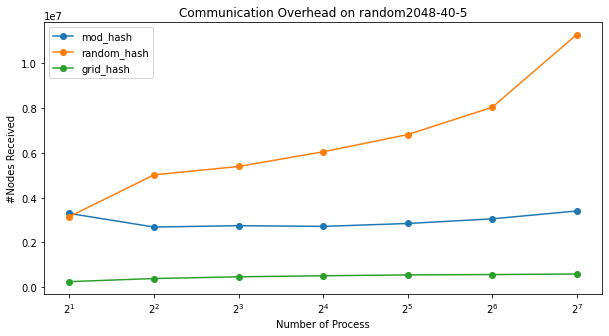

In [169]:
map = "random2048-40-5.csv"
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.set_xscale('log', base=2)
ax.set_title(f"Communication Overhead on {map[:-4]}")
plt.setp(ax, xlabel="Number of Process")
plt.setp(ax, ylabel="#Nodes Received")
for hash in ['mod_hash', 'random_hash', 'grid_hash']:
    csv_map_path = os.path.join(csv_dir, hash, map)
    df = pd.read_csv(csv_map_path)
    df = df[df['#node received'] > 0]
    for idx, row in df.iterrows():
        df.at[idx, "#node received"] = row["#node received"] * row["nproc"]
    group_dict = {'#node received':['mean']}
    gdf = df.groupby(['instance name', 'nproc'], as_index=False).agg(group_dict)
    ax.plot(gdf['nproc'], gdf['#node received']['mean'], 'o-', label=hash )

ax.legend()
fig.savefig(f"./figures/commnode.png", bbox_inches='tight', dpi=600)



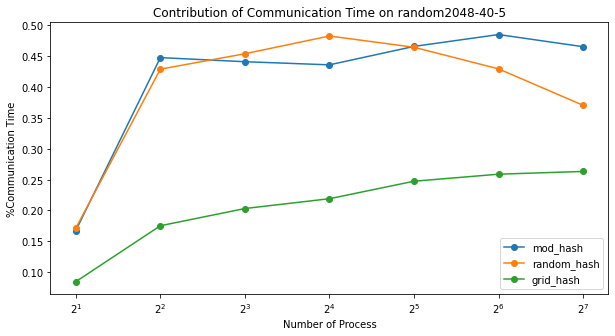

In [172]:
map = "random2048-40-5.csv"
# map = "Paris_1_4096.csv"
# map = "maze2048-4-6.csv"
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.set_xscale('log', base=2)
ax.set_title(f"Contribution of Communication Time on {map[:-4]}")
plt.setp(ax, xlabel="Number of Process")
plt.setp(ax, ylabel="%Communication Time")
for hash in ['mod_hash', 'random_hash', 'grid_hash']:
    csv_map_path = os.path.join(csv_dir, hash, map)
    df = pd.read_csv(csv_map_path)
    df['comm time'] = None
    df_base = df[df['#node received']==0]
    df = df[df['#node received'] > 0]
    for idx, row in df.iterrows():
        instance = row['instance name']
        trial_idx = row['trial index']
        base_row = df_base[(df_base['instance name']==instance) & (df_base['trial index']==trial_idx)].iloc[0]
        df.at[idx, 'work overhead'] = row['#node expanded'] / base_row['#node expanded']
    df['comm time'] = (df['send msg time'] + df['rcv msg time']) / df['runtime']
    df['comm time'] = df['comm time'].astype(float)
    group_dict = {'comm time':['mean']}
    gdf = df.groupby(['instance name', 'nproc'], as_index=False).agg(group_dict)
    ax.plot(gdf['nproc'], gdf['comm time']['mean'], 'o-', label=hash )

ax.legend()
fig.savefig(f"./figures/commtime.png", bbox_inches='tight', dpi=600)
